In [1]:
from topsacred.nblab import *
%matplotlib inline

In [2]:
client = pymongo.MongoClient()
db = client.INPUT
coll = db.study1.runs

In [3]:
# sacred_stats()   # run this to scan all(!) mongo databases for sacred collections
sacred_stats(db)

,FAILED,COMPLETED,TOTAL
cnn_explore.chunks,0,0,18
cnn_explore.files,0,0,18
cnn_explore.runs,2,13,15
study1.chunks,0,0,1421
study1.files,0,0,1421
study1.runs,0,1420,1420


In [4]:
r = coll.find_one()

In [5]:
custom_cols = {
    'min_train_loss': lambda x: np.min(x['info']['logs']['rolling_training']['total_loss']),
    'max_train_loss': lambda x: np.max(x['info']['logs']['rolling_training']['total_loss']),
}

In [6]:
df = get_results(coll, custom_cols=custom_cols)
df

skipping           batch_size = 128
skipping             filename = IDSIA_PrimerDataHDF5_20160301_v1.h5
skipping           max_epochs = 500
skipping             patience = 20
skipping              shuffle = True
skipping            step_size = 50
skipping           str_subset = [0, 1, 2, 3]
skipping            val_split = 0.1
skipping              verbose = False
skipping          window_size = 128


,max_train_loss,min_train_loss,result,learn_rate,net_spec,pos_subset,seed,subject
0,0.325845,0.043518,0.976531,0.30,F100 F100,[2],987250871,1
1,1.128477,0.134171,0.972506,0.03,Fr50,[4],208570300,12
2,0.581903,0.103010,0.971259,0.03,Fr100,"[1, 2, 3]",591994305,1
3,0.534147,0.116663,0.970918,0.30,F100 D F100,[2],478964644,1
4,1.048674,0.100230,0.970408,0.01,Fr200,[1],38197197,1
5,0.650800,0.106073,0.970408,0.10,F100 D F100,[1],376395355,1
6,0.479184,0.146046,0.968537,0.30,F100 D F100,"[1, 2, 3]",254675587,2
7,0.686621,0.052569,0.968027,0.03,F100 F100,[1],445641543,1
8,0.826860,0.097494,0.967687,0.03,Fr50,[1],962406769,1
9,0.472241,0.105202,0.967687,0.30,F100 D F100,[1],464267790,1


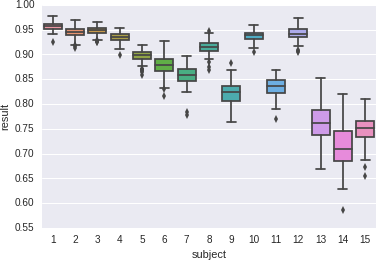

In [7]:
# Using seaborn it is very easy to get nice plots from these dataframes:
sns.boxplot(x='subject', y='result', data=df)

In [8]:
# Use this library to get nicer tables that you can filter and sort interactively
import qgrid
qgrid.nbinstall(overwrite=True)


In [9]:
qgrid.show_grid(df)